# CARGA DE LOS DATOS PARA EL PROYECTO

Analizar y comparar los países nórdicos con España utilizando una base de datos de Kaggle sobre la felicidad (happiness):

## IMPORTAR LIBRERÍAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTAR DATOS

Al analisar cada fichero CSV para empezar con el proceso de carga, hemos detectado varios problemas referente a la estructura de columnas de los ficheros:

- Nombres de columnas compuestos por dos textos y con espacios entre ellos.
- Nombres de columnas compuestos por dos textos y con un punto (.) entre ellos.
- Nombres de columnas compuestos por dos textos y con dos puntos (..) entre ellos.
- Mismas informaciones con nombres de columnas distinctas.
- Cantidad de columnas diferentes entre los ficheros CSVs.
- Hay CSV en que almacena en la misma columna "país" y "región".
- Hay CSV que no tiene la columna "región".
- Las columnas y los registros estan en idioma inglés.
- No hay columna año dentro de los ficheros. El año encuentra-se en la composición del nombre del fichero CSV, ejemplo(2015.csv, 2016.csv y así sucesivamente).

Hemos detectado que hay CSV que no tiene la columna "Family" y en su lugar, esta la de "Social Support" que tiene un objetivo muy parecido. En este caso decidimos fusionar la columna "Family" con la de "Social Support" en el DataFrame unico.
  - La columna "Social support" (apoyo social) en los datos de felicidad se refiere a la medida en que las personas perciben tener apoyo social disponible en su vida. Esta medida incluye el apoyo de amigos, vecinos, familiares y otras personas cercanas. Representa la percepción de las personas sobre el apoyo emocional y material que reciben de su entorno social. La columna "Social support" incluye un alcance más amplio que abarca tanto el apoyo familiar como el apoyo de otros individuos fuera del ámbito familiar. 
  - Por otro lado, la columna "family" (familia) se refiere específicamente al apoyo y la relación con la familia. Esta medida se centra en la percepción de apoyo emocional y material proveniente de los miembros de la familia, como cónyuges, hijos, padres y hermanos.


Solución para tratamiento de los datos en la carga de los CSVs:
- Cargar individualmente cada CSV y de paso, agregar la columna de año que faltaba.


### Definir las rutas de los ficheros leídos y generados en el proceso de carga de datos

In [2]:
# Definir la ruta donde se encuentra la carpeta y los CSVs que iremos trabajar
ruta_2015 = '../data/2015.csv'
ruta_2016 = '../data/2016.csv'
ruta_2017 = '../data/2017.csv'
ruta_2017_v2 = '../data/2017_v2.csv'
ruta_2018 = '../data/2018.csv'
ruta_2019 = '../data/2019.csv'


### Importar CSVs

#### Importar 2015

In [3]:
# CSV original
df_2015_original = pd.read_csv(ruta_2015)
df_2015_original.columns


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
# Especifica los nombres de las columnas que deseas importar
columnas_deseadas = ['Country', 'Region', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', \
                    'Freedom', 'Trust (Government Corruption)', 'Generosity']

# Lee el archivo CSV incluyendo solamente las columnas especificadas
df_2015 = pd.read_csv(ruta_2015, usecols=columnas_deseadas)

# Crea columna año y atribuye el valor correspondente al año que vemos compuesto en el propio nombre del
# fichero csv importado
df_2015["ANO"] = '2015'

# Renombra las columas para que esten iguales en todos los Dataframes
df_2015.rename(columns={'Family': 'Social support'}, inplace=True)

df_2015.head(2)

,Country,Region,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,ANO
0,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015


#### Importar 2016

In [5]:
# CSV original
df_2016_original = pd.read_csv(ruta_2016)
df_2016_original.columns


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [6]:
# Especifica los nombres de las columnas que deseas importar
columnas_deseadas = ['Country', 'Region', 'Economy (GDP per Capita)', 'Family','Health (Life Expectancy)', \
                    'Freedom', 'Trust (Government Corruption)', 'Generosity']

# Lee el archivo CSV incluyendo solamente las columnas especificadas
df_2016 = pd.read_csv(ruta_2016, usecols=columnas_deseadas)

# Crea columna año y atribuye el valor correspondente al año que vemos compuesto en el propio nombre del
# fichero csv importado
df_2016["ANO"] = '2016'

# Renombra las columas para que esten iguales en todos los Dataframes
df_2016.rename(columns={'Family': 'Social support'}, inplace=True)

df_2016.head(2)

,Country,Region,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,ANO
0,Denmark,Western Europe,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,Western Europe,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016


#### Importar 2017

In [7]:
# CSV original 
df_2017_original = pd.read_csv(ruta_2017)
df_2017_original.columns
df_2017_original.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [8]:
# Especifica los nombres de las columnas que deseas importar
columnas_deseadas = ['Country', 'Economy..GDP.per.Capita.', 'Family','Health..Life.Expectancy.', \
                    'Freedom', 'Trust..Government.Corruption.', 'Generosity']

# Lee el archivo CSV incluyendo solamente las columnas especificadas
df_2017 = pd.read_csv(ruta_2017, usecols=columnas_deseadas)

# Crea columna año y atribuye el valor correspondente al año que vemos compuesto en el propio nombre del
# fichero csv importado.
df_2017["ANO"] = '2017'
df_2017["Region"] = 'Western Europe'

# Renombra las columas para que esten iguales en todos los Dataframes
df_2017.rename(columns={'Country': 'Country', \
                   'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', \
                   'Family': 'Social support', \
                   'Health..Life.Expectancy.': 'Health (Life Expectancy)', \
                   'Freedom': 'Freedom', \
                   'Trust..Government.Corruption.': 'Trust (Government Corruption)', \
                   'Generosity': 'Generosity'
                   }, inplace=True)

df_2017.head(2)

,Country,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),ANO,Region
0,Norway,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017,Western Europe
1,Denmark,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017,Western Europe


#### Importar 2018

In [9]:
# CSV original
df_2018_original = pd.read_csv(ruta_2018)
df_2018_original.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [10]:
# Especifica los nombres de las columnas que deseas importar
columnas_deseadas = ['Country or region', 'GDP per capita', 'Social support','Healthy life expectancy', \
                    'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']

# Lee el archivo CSV incluyendo solamente las columnas especificadas
df_2018 = pd.read_csv(ruta_2018, usecols=columnas_deseadas)

# Crea columna año y atribuye el valor correspondente al año que vemos compuesto en el propio nombre del
# fichero csv importado.
df_2018["ANO"] = '2018'
df_2018["Region"] = 'Western Europe'

# Renombra las columas para que esten iguales en todos los Dataframes
df_2018.rename(columns={'Country or region': 'Country', \
                   'GDP per capita': 'Economy (GDP per Capita)', \
                   'Healthy life expectancy': 'Health (Life Expectancy)', \
                   'Freedom to make life choices': 'Freedom', \
                   'Perceptions of corruption': 'Trust (Government Corruption)', \
                   'Generosity': 'Generosity'
                   }, inplace=True)

df_2018.head(2)

,Country,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),ANO,Region
0,Finland,1.305,1.592,0.874,0.681,0.202,0.393,2018,Western Europe
1,Norway,1.456,1.582,0.861,0.686,0.286,0.340,2018,Western Europe


#### Importar 2019

In [11]:
# CSV original
df_2019_original = pd.read_csv(ruta_2019)
df_2019_original.columns


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [12]:
# Especifica los nombres de las columnas que deseas importar
columnas_deseadas = ['Country or region', 'GDP per capita', 'Social support','Healthy life expectancy', \
                    'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']

# Lee el archivo CSV incluyendo solamente las columnas especificadas
df_2019 = pd.read_csv(ruta_2018, usecols=columnas_deseadas)

# Crea columna año y atribuye el valor correspondente al año que vemos compuesto en el propio nombre del
# fichero csv importado
df_2019["ANO"] = '2019'
df_2019["Region"] = 'Western Europe' # Como vamos trabajar solamente con países de esta Región, desde ya actualizo este dato aquí mismo.

# Renombra las columas para que esten iguales en todos los Dataframes
df_2019.rename(columns={'Country or region': 'Country', \
                   'GDP per capita': 'Economy (GDP per Capita)', \
                   'Healthy life expectancy': 'Health (Life Expectancy)', \
                   'Freedom to make life choices': 'Freedom', \
                   'Perceptions of corruption': 'Trust (Government Corruption)', \
                   'Generosity': 'Generosity'
                   }, inplace=True)

df_2019.head(2)

,Country,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),ANO,Region
0,Finland,1.305,1.592,0.874,0.681,0.202,0.393,2019,Western Europe
1,Norway,1.456,1.582,0.861,0.686,0.286,0.340,2019,Western Europe


## TRATAR DATOS

Este procedimiento consiste en realizar los ajustes mas profundos en los datos para prepararlos para la próxima fase del proyecto. 

### Fusionar en un unico DataFrame todos los datos

In [13]:
# Después de tenernos uniformizados los nombres de las columnas de todos los CSVs importados, llega el momento de 
# fusionar todos los datos en un unico DataFrame

frames = [df_2015, df_2016, df_2017, df_2018, df_2019]  # Lista de DataFrames que quieres unificar
df = pd.concat(frames, ignore_index=True)
df.head()

,Country,Region,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,ANO
0,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


### Cambiar de posición la columna "ANO"

In [14]:
# Extraer la columna 'ANO' utilizando el método 'pop'
columma_ano = df.pop('ANO')

# Insertar la columna 'ANO' en la primera posición utilizando el método 'insert'
df.insert(0, 'ANO', columma_ano)

# Cambiar a Entero el tipo de datos de la columna "ANO"
df['ANO'] = pd.to_numeric(df['ANO'], errors='coerce').astype(int)

df

,ANO,Country,Region,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
777,2019,Yemen,Western Europe,0.44200,1.07300,0.34300,0.24400,0.06400,0.08300
778,2019,Tanzania,Western Europe,0.45500,0.99100,0.38100,0.48100,0.09700,0.27000
779,2019,South Sudan,Western Europe,0.33700,0.60800,0.17700,0.11200,0.10600,0.22400
780,2019,Central African Republic,Western Europe,0.02400,0.00000,0.01000,0.30500,0.03800,0.21800


### Traduccir columnas y datos al idioma español

Renombrar los nombres de las columnas del DataFrame

In [15]:

# Crear un diccionario con los nuevos nombres de las columnas
nuevos_nombres = {
    'Country': 'PAIS',
    'Region': 'REGION',
    'Economy (GDP per Capita)': 'ECONOMIA_PIB_PER_CAPITA',
    'Social support': 'APOYO_SOCIAL',
    'Health (Life Expectancy)': 'SALUD_ESPERANZA_DE_VIDA',
    'Freedom': 'LIBERTAD',
    'Trust (Government Corruption)': 'PERCEPCION_CORRUPCION',
    'Generosity': 'GENEROSIDAD'
}

# Renombrar las columnas
df = df.rename(columns=nuevos_nombres)
df.head()

,ANO,PAIS,REGION,ECONOMIA_PIB_PER_CAPITA,APOYO_SOCIAL,SALUD_ESPERANZA_DE_VIDA,LIBERTAD,PERCEPCION_CORRUPCION,GENEROSIDAD
0,2015,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


Traduccir al español, los registros contenidos dentro de las columnas "PAIS" y "REGION"

- Aquí traduccimos los nombres solamente para los países y región que vamos tratar en el proyecto

In [16]:

# Crear el dataframe
df_traduccido = pd.DataFrame({'PAIS': ['Denmark', 'Finland', 'Iceland', 'Norway', 'Sweden', 'Spain'],
                                      'REGION': ['Western Europe', 'Western Europe', 'Western Europe', \
                                                 'Western Europe', 'Western Europe', 'Western Europe']})

# Crear el diccionario de mapeo para los valores de Country
paises_mapeados = {'Denmark': 'Dinamarca', 'Finland': 'Finlandia', 'Iceland': 'Islandia', 'Norway': 'Noruega', 'Sweden': 'Suecia', 'Spain': 'España'}

# Crear el diccionario de mapeo para el valor de Region
regiones_mapeadas = {'Western Europe': 'Europa Occidental'}

# Renombrar los valores en el dataframe
df_traduccido = df.replace({'PAIS': paises_mapeados, 'REGION': regiones_mapeadas})

# Imprimir el dataframe actualizado
df_traduccido.head()


,ANO,PAIS,REGION,ECONOMIA_PIB_PER_CAPITA,APOYO_SOCIAL,SALUD_ESPERANZA_DE_VIDA,LIBERTAD,PERCEPCION_CORRUPCION,GENEROSIDAD
0,2015,Switzerland,Europa Occidental,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Islandia,Europa Occidental,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Dinamarca,Europa Occidental,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Noruega,Europa Occidental,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


## SELECCIONAR LOS DATOS DE INTERÉS PARA EL PROYECTO

In [17]:
# selecionamos a los países que iremos trabajar en el proyecto
paises_seleccionados = ['Dinamarca', 'Finlandia', 'Islandia', 'Noruega', 'Suecia', 'España']

# Filtrar el DataFrame utilizando el método "isin" de Pandas
df = df_traduccido[df_traduccido['PAIS'].isin(paises_seleccionados)]

df.head()

,ANO,PAIS,REGION,ECONOMIA_PIB_PER_CAPITA,APOYO_SOCIAL,SALUD_ESPERANZA_DE_VIDA,LIBERTAD,PERCEPCION_CORRUPCION,GENEROSIDAD
1,2015,Islandia,Europa Occidental,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Dinamarca,Europa Occidental,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Noruega,Europa Occidental,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
5,2015,Finlandia,Europa Occidental,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
7,2015,Suecia,Europa Occidental,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262


In [18]:
df.columns

Index(['ANO', 'PAIS', 'REGION', 'ECONOMIA_PIB_PER_CAPITA', 'APOYO_SOCIAL',
       'SALUD_ESPERANZA_DE_VIDA', 'LIBERTAD', 'PERCEPCION_CORRUPCION',
       'GENEROSIDAD'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 661
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ANO                      30 non-null     int32  
 1   PAIS                     30 non-null     object 
 2   REGION                   30 non-null     object 
 3   ECONOMIA_PIB_PER_CAPITA  30 non-null     float64
 4   APOYO_SOCIAL             30 non-null     float64
 5   SALUD_ESPERANZA_DE_VIDA  30 non-null     float64
 6   LIBERTAD                 30 non-null     float64
 7   PERCEPCION_CORRUPCION    30 non-null     float64
 8   GENEROSIDAD              30 non-null     float64
dtypes: float64(6), int32(1), object(2)
memory usage: 2.2+ KB


In [25]:
df.describe().round(2)

,ANO,ECONOMIA_PIB_PER_CAPITA,APOYO_SOCIAL,SALUD_ESPERANZA_DE_VIDA,LIBERTAD,PERCEPCION_CORRUPCION,GENEROSIDAD
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,2017.00,1.39,1.43,0.87,0.61,0.30,0.30
std,1.44,0.09,0.18,0.05,0.09,0.14,0.09
min,2015.00,1.23,1.09,0.79,0.38,0.06,0.14
25%,2016.00,1.33,1.31,0.83,0.58,0.14,0.24
50%,2017.00,1.36,1.52,0.87,0.63,0.37,0.29
75%,2018.00,1.45,1.58,0.91,0.68,0.41,0.36
max,2019.00,1.62,1.64,0.96,0.69,0.48,0.48


In [21]:
df.isnull().sum()

ANO                        0
PAIS                       0
REGION                     0
ECONOMIA_PIB_PER_CAPITA    0
APOYO_SOCIAL               0
SALUD_ESPERANZA_DE_VIDA    0
LIBERTAD                   0
PERCEPCION_CORRUPCION      0
GENEROSIDAD                0
dtype: int64

In [22]:

# PAÍSES NÓRDICOS
# Crear una lista con los países nórdicos
paises_nordicos = ['Dinamarca', 'Finlandia', 'Islandia', 'Noruega', 'Suecia']
# Filtrar el DataFrame utilizando el método "isin" de Pandas
paises_nordicos_df = df[df['PAIS'].isin(paises_nordicos)]

paises_nordicos_df.head()


,ANO,PAIS,REGION,ECONOMIA_PIB_PER_CAPITA,APOYO_SOCIAL,SALUD_ESPERANZA_DE_VIDA,LIBERTAD,PERCEPCION_CORRUPCION,GENEROSIDAD
1,2015,Islandia,Europa Occidental,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Dinamarca,Europa Occidental,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Noruega,Europa Occidental,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
5,2015,Finlandia,Europa Occidental,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
7,2015,Suecia,Europa Occidental,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262


In [23]:

# ESPAÑA
espana = df[df['PAIS'] == 'España']
espana

,ANO,PAIS,REGION,ECONOMIA_PIB_PER_CAPITA,APOYO_SOCIAL,SALUD_ESPERANZA_DE_VIDA,LIBERTAD,PERCEPCION_CORRUPCION,GENEROSIDAD
35,2015,España,Europa Occidental,1.230110,1.313790,0.955620,0.459510,0.063980,0.182270
194,2016,España,Europa Occidental,1.342530,1.129450,0.878960,0.375450,0.061370,0.176650
348,2017,España,Europa Occidental,1.384398,1.532091,0.888961,0.408781,0.070914,0.190134
505,2018,España,Europa Occidental,1.251000,1.538000,0.965000,0.449000,0.074000,0.142000
661,2019,España,Europa Occidental,1.251000,1.538000,0.965000,0.449000,0.074000,0.142000


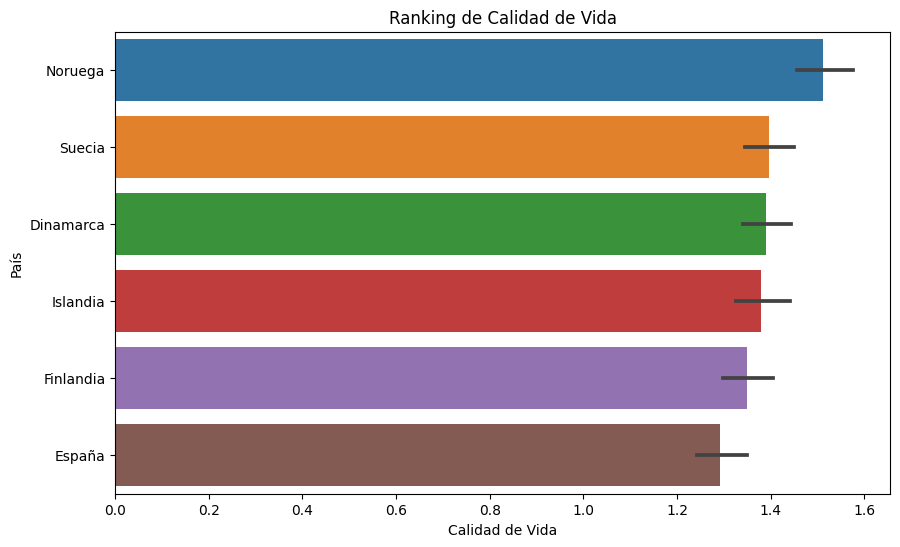

In [24]:

# Calcular rankings por diferentes criterios
# Ejemplo: ranking de calidad de vida
ranking_calidad_vida = df.sort_values('ECONOMIA_PIB_PER_CAPITA', ascending=False)

# Visualizar rankings
plt.figure(figsize=(10, 6))
sns.barplot(x='ECONOMIA_PIB_PER_CAPITA', y='PAIS', data=ranking_calidad_vida)
plt.title('Ranking de Calidad de Vida')
plt.xlabel('Calidad de Vida')
plt.ylabel('País')
plt.show()
